<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#XGBoost原理" data-toc-modified-id="XGBoost原理-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>XGBoost原理</a></span><ul class="toc-item"><li><span><a href="#提升方法（Boosting）" data-toc-modified-id="提升方法（Boosting）-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>提升方法（Boosting）</a></span></li><li><span><a href="#提升决策树-（BDT，Boosting-Decision-Tree）" data-toc-modified-id="提升决策树-（BDT，Boosting-Decision-Tree）-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>提升决策树 （BDT，Boosting Decision Tree）</a></span></li><li><span><a href="#梯度提升决策树-（GBDT，Gradient-Boosting-Decision-Tree）" data-toc-modified-id="梯度提升决策树-（GBDT，Gradient-Boosting-Decision-Tree）-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>梯度提升决策树 （GBDT，Gradient Boosting Decision Tree）</a></span></li><li><span><a href="#极限梯度提升（XGBoost，eXtreme-Gradient-Boosting）" data-toc-modified-id="极限梯度提升（XGBoost，eXtreme-Gradient-Boosting）-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>极限梯度提升（XGBoost，eXtreme Gradient Boosting）</a></span></li></ul></li><li><span><a href="#XGBoost应用" data-toc-modified-id="XGBoost应用-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>XGBoost应用</a></span><ul class="toc-item"><li><span><a href="#XGBoost参数" data-toc-modified-id="XGBoost参数-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>XGBoost参数</a></span><ul class="toc-item"><li><span><a href="#通用参数" data-toc-modified-id="通用参数-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>通用参数</a></span></li><li><span><a href="#提升器参数" data-toc-modified-id="提升器参数-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>提升器参数</a></span></li><li><span><a href="#学习任务参数" data-toc-modified-id="学习任务参数-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>学习任务参数</a></span></li></ul></li><li><span><a href="#XGBoost的基本使用应用" data-toc-modified-id="XGBoost的基本使用应用-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>XGBoost的基本使用应用</a></span></li><li><span><a href="#XGBoost与LightGBM的对比分析" data-toc-modified-id="XGBoost与LightGBM的对比分析-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>XGBoost与LightGBM的对比分析</a></span></li><li><span><a href="#LightGBM的应用" data-toc-modified-id="LightGBM的应用-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LightGBM的应用</a></span></li></ul></li></ul></div>

XGBoost是在传统的模型（GBDT）上改进得来的，改进的方法有：1.正则化项，2. 2阶泰勒展开的应用。

# XGBoost
$$
\begin{align}
X\!G\!Boost&=eXtreme+GBDT\\
&=eXtreme+(Gradient+BDT) \\
&=eXtreme+Gradient+(Boosting+DecisionTree)
\end{align}
$$  

$$Boosting \to BDT \to GBDT \to X\!G\!Boost$$

XGBoost 就是用决策树模型进行集成学习（boosting），构建集成决策树，然后进行一系列的优化，就可以得到XGBoost。

XGBoost拆开其实就是极限的GBDT，就是把梯度提升决策树在工程上做了大量的优化改进，所以XGBoost本质上就是梯度提升决策树，只不过做了大量的工程改进。那下面面试官就问什么是梯度提升决策树啊？

梯度提升决策树就是在集成决策树上使用了一阶梯度作为残差拟合对象，这就是所谓的梯度提升决策树。面试官又会问：什么是集成决策树？

集成决策树就是用boosting方法，把我们的决策树进行集成构建的模型。

所以反推回去，到底什么是XGBoost？就是在决策树模型的基础上，使用boosting方法进行集成，构建了所谓的BDT。在集成决策树的基础上，使用一阶梯度进行残差拟合，构成了所谓的梯度提升决策树。在此基础上进行一系列的优化改进，最终的目标就是我们的XGBoost。

XGBoost主要的优化有：1.正则化项，2. 2阶泰勒展开的应用。

梯度提升决策树：用梯度信息，代替残差

## XGBoost原理

### 提升方法（Boosting）  
&emsp;&emsp;提升方法使用加法模型和前向分步算法。

&emsp; &emsp;加法模型
$$f\left(x\right)=\sum_{m=1}^M\beta_m b\left(x;\gamma_m\right) \tag{1.1}$$
其中，$b\left(x;\gamma_m\right)$为基函数，$\gamma_m$为基函数的参数，$\beta_m$为基函数的系数。

&emsp;&emsp;在给定训练数据$\{\left(x_i,y_i\right)\}_{i=1}^N$及损失函数$L\left(y,f\left(x\right)\right)$的条件下，学习加法模型$f\left(x\right)$成为经验风险极小化问题：
$$\min_{\beta_m,\gamma_m}\sum_{i=1}^N L\left(y_i,\sum_{m=1}^M\beta_m b\left(x_i;\gamma_m\right)\right)\tag{1.2}$$

&emsp;&emsp;前向分步算法求解这一优化问题的思路：因为学习的是加法模型，可以从前向后，每一步只学习一个基函数及其系数，逐步逼近优化目标函数式（1.2），则可以简化优化复杂度。具体地，每步只需优化如下损失函数：
$$\min_{\beta,\gamma}\sum_{i=1}^N L\left(y_i,\beta b\left(x_i;\gamma\right)\right)\tag{1.3}$$

算法1.1 前向分步算法  
输入：训练数据集$T=\{\left(x_1,y_1\right),\left(x_2,y_2\right),\dots,\left(x_N,y_N\right)\}$； 损失函数$L\left(y,f\left(x\right)\right)$；基函数集合$\{b\left(x;\gamma\right)\}$；   
输出：加法模型$f\left(x\right)$  
（1）初始化$f_0\left(x\right)=0$  
（2）对$m=1,2,\dots,M$  
（a）极小化损失函数
$$\left(\beta_m,\gamma_m\right)=\mathop{\arg\min}_{\beta,\gamma} \sum_{i=1}^N L\left(y_i, f_{m-1}\left(x_i\right)+\beta b\left(x_i;\gamma\right)\right) \tag{1.4}$$  
得到参数$\beta_m$，$\gamma_m$  
（b）更新
$$f_m\left(x\right)=f_{m-1}\left(x\right)+\beta_m b\left(x;\gamma_m\right) \tag{1.5}$$  
（3）得到加法模型  
$$f\left(x\right)=f_M\left(x\right)=\sum_{m=1}^M\beta_m b\left(x;\gamma_m\right) \tag{1.6}$$

&emsp;&emsp;前向分步算法将同时求解从$m=1$到$M$所有参数$\beta_m,\gamma_m$的优化问题简化为逐次求解各个$\beta_m, \gamma_m$的优化问题。

### 提升决策树 （BDT，Boosting Decision Tree）

&emsp;&emsp;以决策树为基函数的提升方法为提升决策树。

In [ ]:
基函数约束为决策树模型，模型系数被规定为1，则为提升决策树。

&emsp;&emsp;提升决策树模型可以表示为决策树的加法模型：  
$$f_M=\sum_{m=1}^M T\left(x;\Theta_m\right) \tag{2.1}$$  
其中，$T\left(x;\Theta_m\right)$表示决策树；$\Theta_m$为决策树的参数；$M$为树的个数。

&emsp;&emsp;提升决策树采用前向分步算法。首先确定初始提升决策树$f_0\left(x\right)=0$，第$m$步的模型是
$$f_m\left(x\right)=f_{m-1}\left(x\right)+T\left(x;\Theta_m\right) \tag{2.2}$$
其中，$f_{m-1}\left(x\right)$为当前模型，通过经验风险极小化确定下一棵决策树的参数$\Theta_m$，
$$\hat{\Theta}_m=\mathop{\arg\min}_{\Theta_m}\sum_{i=1}^N L\left(y_i,f_{m-1}\left(x_i\right)+T\left(x_i;\Theta_m\right)\right) \tag{2.3}$$

&emsp;&emsp;已知训练数据集$T=\{\left(x_1,y_1\right),\left(x_2,y_2\right),\dots\left(x_N,y_N\right)\}$，$x_i\in\mathcal{X}\subseteq\mathbb{R}^n$，$\mathcal{X}$为输入空间，$y_i\in\mathcal{Y}\subseteq\mathbb{R}$，$\mathcal{Y}$为输出空间。如果将输入空间$\mathcal{X}$划分为$J$个互不相交的区域$R_1,R_2,\dots,R_J$，并且在每个区域上确定输出的常量$c_j$，那么决策树可表示为
$$T\left(x;\Theta\right)=\sum_{j=1}^J c_j I\left(x\in R_j\right) \tag{2.4}$$
其中，参数$\Theta=\{\left(R_1,c_1\right),\left(R_2,c_2\right),\dots,\left(R_J,c_J\right)\}$表示决策树的区域划分和各区域上的常量值。$J$是决策树的复杂度即叶子结点个数。

&emsp;&emsp;提升决策树使用以下前向分步算法：
$$\begin{align}
f_0\left(x\right)&=0 \\
f_m\left(x\right)&=f_{m-1}\left(x\right)+T\left(x;\Theta_m\right),\quad m=1,2,\dots,M        \\
f_M\left(x\right)&=\sum_{m=1}^M T\left(x;\Theta_m\right)
\end{align}$$  
在前向分步算法的第$m$步，给定当前模型$f_{m-1}\left(x\right)$，需要求解  
$$\hat{\Theta}_m=\mathop{\arg\min}_{\Theta_m}\sum_{i=1}^N L\left(y_i,f_{m-1}\left(x_i\right)+T\left(x_i;\Theta_m\right)\right)$$
得到$\hat{\Theta}_m$，即第$m$棵树的参数。

&emsp;&emsp;当采用平方误差损失函数时，
$$L\left(y,f\left(x\right)\right)=\left(y-f\left(x\right)\right)^2$$
其损失变为
$$\begin{align}
L\left(y,f_{m-1}\left(x\right)+T\left(x;\Theta_m\right)\right) 
&=\left[y-f_{m-1}\left(x\right)-T\left(x;\Theta_m\right)\right]^2 \\
&=\left[r-T\left(x;\Theta_m\right)\right]^2
\end{align}$$
其中，
$$r=y-f_{m-1}\left(x\right) \tag{2.5}$$
是当前模型拟合数据的残差（residual）。对回归问题的提升决策树，只需要简单地拟合当前模型的残差。

算法2.1 回归问题的提升决策树算法  
输入：训练数据集$T=\{\left(x_1,y_1\right),\left(x_2,y_2\right),\dots,\left(x_N,y_N\right)\}$；   
输出：提升决策树$f_M\left(x\right)$  
（1）初始化$f_0\left(x\right)=0$  
（2）对$m=1,2,\dots,M$  
（a）按照式（2.5）计算残差
$$r_{mi}=y_i-f_{m-1}\left(x_i\right), \quad i=1,2,\dots,N$$  
（b)拟合残差$r_{mi}$学习一个回归树，得到$T\left(x;\Theta_m\right)$  
（c）更新$f_m\left(x\right)=f_{m-1}\left(x\right)+T\left(x;\Theta_m\right) $  
（3）得到回归提升决策树 
$$f_M\left(x\right)=\sum_{m=1}^M T\left(x;\Theta_m\right)   $$

2（a）每一步学习的对象，不再是对数据集T进行学习，而是学习数据集中，对当前模型的上一个模型的残差的学习。换句话说当前第m棵决策树，只针对上一个模型没有预测好的那部分再进行一个学习。

提升决策树是在一般的boosting模型上，使用决策树模型对基函数进行替换，这是第一点。第二点，前提条件不要忘了，加上采用平方误差损失函数，通过一系列的推导发现，在第m步的优化过程中，我们只需要对上一步模型在数据集上没有学好的那一部分，再学习一颗决策树，就可以了。这时，把上一课决策树模型没有学好的那一部分，就是实际输出y和决策树上一个模型f x 那个差值先计算出来，这一步很重要，换句话说，我每一步，只需要对没有学习好的那一部分残差再学习出一棵树，你这棵树还没有学好，还要残差，那就再拟合出一棵树。随着学习的不断进行，你这个残差会越来越小，你想一想，后面的树，只针对越来越小的残差进行学习，当到一定的精度的时候，你的残差就被学习掉了。整个模型，也就达到了我们数据集的数据规律。

### 梯度提升决策树 （GBDT，Gradient Boosting Decision Tree）

将上面的r改成3.1，其它的过程一样，这是GBDT的第一种理解。为什么可以用损失函数的负梯度作为残差呢？

在函数空间中，使用迭代方法，什么叫迭代，我们先构建前一个模型，在此基初上不断的迭代$f^t(x) = f^{t-1}(x) + f_{t}(x)$，就叫做迭代方法。迭代方法有两种，第一种，我们针对上一个模型在实际输出里，没有学习好的部分继续进行学习，这种方法就是我们刚刚在BDT里面介绍的残差的方法。第二种方法就是在函数空间里，直接用损失函数对$f$进行求偏导，这样再加上负号，就是在函数空间里，使得损失最小的方向，再加上负梯度，也是使用迭代方法，构建模型的一个方式。很显然，这次的学习目标，也变成了一个负梯度。

&emsp;&emsp;梯度提升算法使用损失函数的负梯度在当前模型的值
$$-\left[\frac{\partial L\left(y,f\left(x_i\right)\right)}{\partial f\left(x_i\right)}\right]_{f\left(x\right)=f_{m-1}\left(x\right)} \tag{3.1}$$
作为回归问题提升决策树算法中残差的近似值，拟合一个回归树。

算法3.1 梯度提升算法  
输入：训练数据集$T=\{\left(x_1,y_1\right),\left(x_2,y_2\right),\dots,\left(x_N,y_N\right)\}$； 损失函数$L\left(y,f\left(x\right)\right)$  
输出：梯度提升决策树$\hat{f}\left(x\right)$  
（1）初始化
$$f_0\left(x\right)=\mathop{\arg\min}_c\sum_{i=1}^N L\left(y_i,c\right)$$
（2）对$m=1,2,\dots,M$  
（a）对$i=1,2,\dots,N$，计算
$$r_{mi}=-\left[\frac{\partial L\left(y,f\left(x_i\right)\right)}{\partial f\left(x_i\right)}\right]_{f\left(x\right)=f_{m-1}\left(x\right)}$$  
（b)对$r_{mi}$拟合一个回归树，得到第$m$棵树的叶结点区域$R_{mj},j=1,2,\dots,J$  
（c）对$j=1,2,\dots,J$，计算
$$c_{mj}=\mathop{\arg\min}_c\sum_{x_i\in R_{mj}} L\left(y_i, f_{m-1}\left(x_i\right)+c\right)$$  
（d）更新$f_m\left(x\right)=f_{m-1}\left(x\right)+\sum_{j=1}^J c_{mj} I\left(x\in R_{mj}\right)$  
（3）得到回归梯度提升决策树 
$$\hat{f}\left(x\right)=f_M\left(x\right)=\sum_{m=1}^M \sum_{j=1}^J c_{mj} I\left(x\in R_{mj}\right)  $$

### 极限梯度提升（XGBoost，eXtreme Gradient Boosting）

XGBoost就是在GBDT上进行了改进，第一个是加入了正则化项，我们发现，GBTD甚至包括前面的BDT中，我们都没有讨论正则化项，我们的学习目标都是使得经验风险最小化，那么很显然，我们可以加入正则化项，从经验风险最小化，变成结构风险最小化。第二点，在我们的学习过程中一直使用的是梯度信息，梯度信息是一阶的，那么我们可以使用泰勒展开，使用二阶梯度。所以现在来看，这个改进是很自然的，就是在原来的模型上进行了相应的改进而已，但是就是因为这两个改进，取得了非常好的成果。

&emsp;&emsp;训练数据集$\mathcal{D}=\{\left(\mathbf{x}_i,y_i\right)\}$，其中$\mathbf{x}_i\in\mathbb{R}^m,y_i\in\mathbb{R},\left|\mathcal{D}\right|=n$。

&emsp;&emsp;决策树模型
$$f\left(\mathbf{x}\right)=w_{q\left(\mathbf{x}\right)} \tag{4.1}$$
其中，$q:\mathbb{R}^m\to \{1,\dots,T\}$是由输入$\mathbf{x}$向叶子结点编号的映射，$w\in\mathbb{R}^T$是叶子结点向量，$T$为决策树叶子节点数。

&emsp;&emsp;提升决策树模型预测输出
$$\hat{y}_i=\phi\left(\mathbf{x}_i\right)=\sum_{k=1}^K f_k\left(\mathbf{x}_i\right) \tag{4.2}$$
其中，$f_k\left(\mathbf{x}\right)$为第$k$棵决策树。

&emsp;&emsp;正则化目标函数
$$\mathcal{L}\left(\phi\right)=\sum_i l\left(\hat{y}_i,y_i\right)+\sum_k \Omega\left(f_k\right) \tag{4.3}$$
其中，$\Omega\left(f\right)=\gamma T+\frac{1}{2}\lambda\|w\|^2=\gamma T+\frac{1}{2}\lambda\sum_{j=1}^T w_j^2$。

&emsp;&emsp;第$t$轮目标函数
$$\mathcal{L}^{\left(t\right)}=\sum_{i=1}^n l\left(y_i,\hat{y}^{\left(t-1\right)}_i+f_t\left(\mathbf{x}_i\right)\right)+\Omega\left(f_t\right) \tag{4.4}$$

&emsp;&emsp;第$t$轮目标函数$\mathcal{L}^{\left(t\right)}$在$\hat{y}^{\left(t-1\right)}$处的二阶泰勒展开
$$\begin{align}
\mathcal{L}^{\left(t\right)}&\simeq\sum_{i=1}^n\left[l\left(y_i,\hat{y}^{\left(t-1\right)}\right)+\partial_{\hat{y}^{\left(t-1\right)}}l\left(y_i,\hat{y}^{\left(t-1\right)}\right) f_t\left(\mathbf{x}_i\right)+\frac{1}{2}\partial^2_{\hat{y}^{\left(t-1\right)}}l\left(y_i,\hat{y}^{\left(t-1\right)}\right) f^2_t\left(\mathbf{x}_i\right)\right]+\Omega\left(f_t\right)  \tag{4.5}  \\
&=\sum_{i=1}^n\left[l\left(y_i,\hat{y}^{\left(t-1\right)}\right)+g_i f_t\left(\mathbf{x}_i\right)+\frac{1}{2}h_i f^2_t\left(\mathbf{x}_i\right)\right]+\Omega\left(f_t\right)
\end{align}$$
其中，$g_i=\partial_{\hat{y}^{\left(t-1\right)}}l\left(y_i,\hat{y}^{\left(t-1\right)}\right),h_i=\partial^2_{\hat{y}^{\left(t-1\right)}}l\left(y_i,\hat{y}^{\left(t-1\right)}\right)$。

&emsp;&emsp;第$t$轮目标函数$\mathcal{L}^{\left(t\right)}$的二阶泰勒展开，并移除关于
$f_t\left(\mathbf{x}_i\right)$常数项
$$\begin{align}
\tilde{\mathcal{L}}^{\left(t\right)}&=\sum_{i=1}^n\left[g_i f_t\left(\mathbf{x}_i\right)+\frac{1}{2}h_i f^2_t\left(\mathbf{x}_i\right)\right]+\Omega\left(f_t\right)  \tag{4.6}\\
&=\sum_{i=1}^n\left[g_i f_t\left(\mathbf{x}_i\right)+\frac{1}{2}h_i f^2_t\left(\mathbf{x}_i\right)\right]+\gamma T+\frac{1}{2}\lambda\sum_{j=1}^T w_j^2
\end{align} \\$$  
定义叶结点$j$上的样本的下标集合$I_j=\{i|q\left(\mathbf{x}_i\right)=j\}$，则目标函数可表示为按叶结点累加的形式
$$\tilde{\mathcal{L}}^{\left(t\right)}=\sum_{j=1}^T\left[\left(\sum_{i\in I_j}g_i\right)w_j+\frac{1}{2}\left(\sum_{i\in I_j}h_i+\lambda\right)w_j^2\right]+\gamma T \tag{4.7}$$

由于$$w_j^*=\mathop{\arg\min}_{w_j}\tilde{\mathcal{L}}^{\left(t\right)}$$
可令$$\frac{\partial\tilde{\mathcal{L}}^{\left(t\right)}}{\partial w_j}=0$$
得到每个叶结点$j$的最优分数为
$$w_j^*=-\frac{\sum_{i\in I_j}g_i}{\sum_{i\in I_j} h_i+\lambda} \tag{4.8}$$

代入每个叶结点$j$的最优分数，得到最优化目标函数值
$$\tilde{\mathcal{L}}^{\left(t\right)}\left(q\right)=-\frac{1}{2}\sum_{j=1}^T 
\frac{\left(\sum_{i\in I_j} g_i\right)^2}{\sum_{i\in I_j} h_i+\lambda}+\gamma T \tag{4.9}$$

&emsp;&emsp;假设$I_L$和$I_R$分别为分裂后左右结点的实例集，令$I=I_L\cup I_R$，则分裂后损失减少量由下式得出
$$\mathcal{L}_{split}=\frac{1}{2}\left[\frac{\left(\sum_{i\in I_L} g_i\right)^2}{\sum_{i\in I_L}h_i+\lambda}+\frac{\left(\sum_{i\in I_R} g_i\right)^2}{\sum_{i\in I_R}h_i+\lambda}-\frac{\left(\sum_{i\in I} g_i\right)^2}{\sum_{i\in I}h_i+\lambda}\right]-\gamma \tag{4.10}$$
用以评估待分裂结点。

算法4.1 分裂查找的精确贪婪算法  
输入：当前结点实例集$I$;特征维度$d$  
输出：根据最大分值分裂  
（1）$gain\leftarrow 0$  
（2）$G\leftarrow\sum_{i\in I}g_i$，$H\leftarrow\sum_{i\in I}h_i$  
（3）for $k=1$ to $d$ do  
（3.1）$G_L \leftarrow 0$，$H_L \leftarrow 0$  
（3.2）for $j$ in sorted($I$, by $\mathbf{x}_{jk}$) do  
（3.2.1）$G_L \leftarrow G_L+g_j$，$H_L \leftarrow H_L+h_j$  
（3.2.2）$G_R \leftarrow G-G_L$，$H_R=H-H_L$  
（3.2.3）$score \leftarrow \max\left(score,\frac{G_L^2}{H_L+\lambda}+\frac{G_R^2}{H_R+\lambda}-\frac{G^2}{H+\lambda}\right)$  
（3.3）end  
（4）end

## XGBoost应用

### XGBoost参数

XGBoost主要参数类型：
1. 通用参数：控制整体功能；
2. 提升器参数：在每一步控制单个提升器（tree、regression）；
3. 学习任务参数：控制最优化执行。

#### 通用参数
booster [default=gbtree]   提升器的选择  
选择每次迭代的模型，有两个选择：
+ gbtree：基于树的模型；
+ gbliner：线性模型。  

silent [default=0]
+ 设置为1，静默模式被开启，不会显示运行信息；
+ 通常设置为0，运行信息会更好的帮助理解模型。

nthread [default=最大可能的线程数]
+ 该参数用以并行处理，应设置为系统内核数；
+ 如果你希望使用所有内核，则不应设置该参数，算法会自动检测。

In [ ]:
eta 在4.4 f（x）前，控制当前模型的权重，控制过拟合的，一般不用改

#### 提升器参数
eta [default=0.3]
+ 学习率；
+ 典型值：0.01-0.2。  

min_child_weight [default=1]
+ 定义最小叶子节点样本权重和；
+ 用于控制过拟合。较大的值可以避免模型学习到局部的特殊样本；
+ 太大的值会导致欠拟合。

max_depth [default=6]
+ 树的最大深度；
+ 用于控制过拟合。较大的值模型会学到更具体更局部的样本；
+ 典型值为3-10。

max_leaf_nodes
+ 树中终端节点或叶子的最大数目；
+ 可以代替max_depth参数。由于创建的是二叉树，一个深度为$n$的树最多生成$2^n$个叶子；
+ 如果该参数被定义，max_depth参数将被忽略。

gamma [default=0]
+ 只有在节点分裂后损失函数值下降，才会分裂该节点。gamma参数指定了节点分裂所需的最小损失函数下降值；
+ 该参数的值越大，算法越保守。该参数的值和损失函数相关，所以是需要调整的。

max_delta_step [default=0]
+ 该参数限制每棵树权重改变的最大步长。如果该参数为0，则表示没有约束。如果将其设置为正值，则使更新步骤更加保守；
+ 通常该参数不需要设置。但是当各类别的样本十分不平衡时，它对逻辑回归是很有帮助的。

subsample [default=1]
+ 该参数控制对于每棵树随机采样的比例；
+ 减小该参数的值，算法会更加保守，避免过拟合。但是，如果该设置得过小，它可能会导致欠拟合；
+ 典型值：0.5-1。

colsample_bytree [default=1]
+ 该参数用来控制每棵随机采样的列数的占比(每一列是一个特征)；
+ 典型值：0.5-1。

colsample_bylevel [default=1]
+ 该参数用来控制树的每一级的每一次分裂，对列数的采样的占比；
+ 该参数和subsample参数可以起到相同的作用。

lambda [default=1]
+ 权重的L2正则化项。(类似于岭回归)。

alpha [default=0]
+ 权重的L1正则化项。(类似于套索回归)；
+ 可以应用在很高维度的情况下，使得算法的速度更快。

scale_pos_weight [default=1]
+ 在各类别样本十分不平衡时，把这个参数设定为一个正值，可以使算法更快收敛。

#### 学习任务参数
objective [default=reg:linear]  
该参数定义需要被最小化的损失函数。常用值有：
+ binary:logistic 二分类的逻辑回归，返回预测的概率(不是类别)；
+ multi:softmax 使用softmax的多分类器，返回预测的类别(不是概率)。在这种情况下，你还需要多设一个参数：num_class(类别数目)；
+ multi:softprob 和multi:softmax参数一样，但是返回的是每个数据属于各个类别的概率。

eval_metric [ default according to objective ]
+ 对于有效数据的度量方法；
+ 对于回归问题，默认值是rmse，对于分类问题，默认值是error；
+ 典型值：
    + rmse 均方根误差
    + mae 平均绝对误差
    + logloss 负对数似然函数值
    + error 二分类错误率(阈值为0.5)
    + merror 多分类错误率
    + mlogloss 多分类logloss损失函数
    + auc 曲线下面积
    
seed [default=0]
+ 随机数的种子
+ 设置它可以复现随机数据的结果，也可以用于调整参数

### XGBoost的基本使用应用

导入XGBoost等相关包：

In [82]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  #非Intel cpu可能会出错，出错就需要加上该句

加载数据，提取特征集和标签：

In [83]:
dataset = loadtxt('./data/pima-indians-diabetes.csv', delimiter=',')

X = dataset[:, 0:8]
y = dataset[:, 8]

将数据划分为训练集和测试集：

In [84]:
seed = 7 
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [85]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((514, 8), (254, 8), (514,), (254,))

创建及训练模型：

In [86]:
model = XGBClassifier(n_jobs=-1)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

使用训练后的模型对测试集进行预测，并计算预测值与实际之间的acc值：

In [87]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


使用训练后的模型对测试集进行预测，得到每个类别的预测概率：

In [88]:
y_pred = model.predict(X_test)
y_pred

array([0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1.

In [89]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[0.9545844 , 0.04541559],
       [0.05245447, 0.9475455 ],
       [0.41897488, 0.5810251 ],
       [0.9831998 , 0.0168002 ],
       [0.4119159 , 0.5880841 ],
       [0.31113452, 0.6888655 ],
       [0.9705527 , 0.02944732],
       [0.93274003, 0.06725994],
       [0.11494881, 0.8850512 ],
       [0.6501156 , 0.34988442],
       [0.03848034, 0.96151966],
       [0.99019825, 0.00980172],
       [0.07478714, 0.92521286],
       [0.0899508 , 0.9100492 ],
       [0.8759558 , 0.12404419],
       [0.8833156 , 0.11668438],
       [0.7805242 , 0.21947582],
       [0.35131902, 0.648681  ],
       [0.98205894, 0.01794105],
       [0.7698676 , 0.23013239],
       [0.6992918 , 0.30070814],
       [0.79318744, 0.20681255],
       [0.3731498 , 0.6268502 ],
       [0.23303777, 0.76696223],
       [0.9244116 , 0.07558843],
       [0.93374586, 0.06625411],
       [0.9396339 , 0.06036608],
       [0.5944243 , 0.4055757 ],
       [0.5389885 , 0.46101153],
       [0.4979669 , 0.5020331 ],
       [0.

输出各特征重要程度：

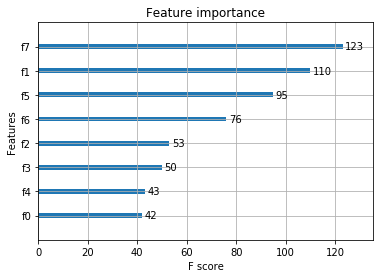

In [90]:
from xgboost import plot_importance
from matplotlib import pyplot
%matplotlib inline

plot_importance(model)
pyplot.show()

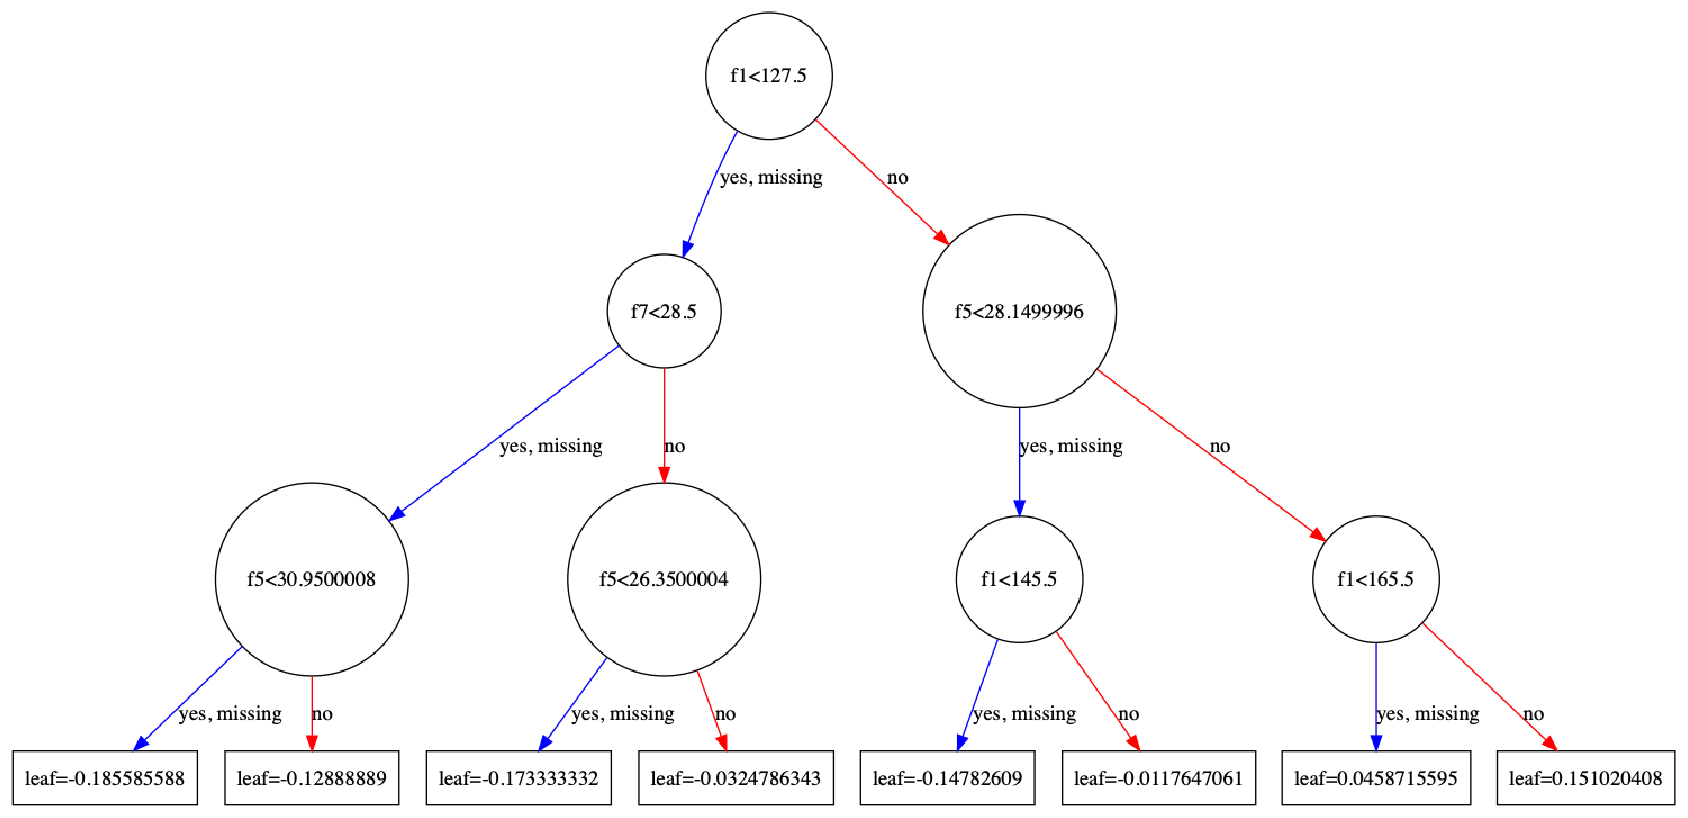

In [98]:
from xgboost import plot_tree

_, ax = plt.subplots(figsize=(30, 30))
plot_tree(model, ax=ax)
plt.show()

导入调参相关包：

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

创建模型及参数搜索空间：

In [14]:
model_GS = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
max_depth = [1, 2, 3, 4, 5]
param_grid = dict(learning_rate=learning_rate, max_depth=max_depth)

设置分层抽样验证及创建搜索对象：

In [15]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
grid_search = GridSearchCV(model_GS, param_grid=param_grid, scoring='neg_log_loss', n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)

In [16]:
y_pred = grid_result.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.10%


In [17]:
grid_result.best_score_, grid_result.best_params_

(-0.47171179660714796, {'learning_rate': 0.2, 'max_depth': 1})

### XGBoost与LightGBM的对比分析

In [18]:
import time

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBClassifier

import lightgbm as lgb
from lightgbm import LGBMClassifier

In [19]:
fetch_from = './data/fashionmnist/fashion-mnist_train.csv'
train = pd.read_csv(fetch_from)

fetch_from = './data/fashionmnist/fashion-mnist_test.csv'
test = pd.read_csv(fetch_from)

In [20]:
X_train, y_train, X_test, y_test = train.iloc[:, 1:], train['label'], test.iloc[:, 1:], test['label']
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [22]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) -1) // images_per_row + 1
    row_images = []
    n_empty = images_per_row * n_rows - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=mpl.cm.binary, **options)
    plt.axis("off")

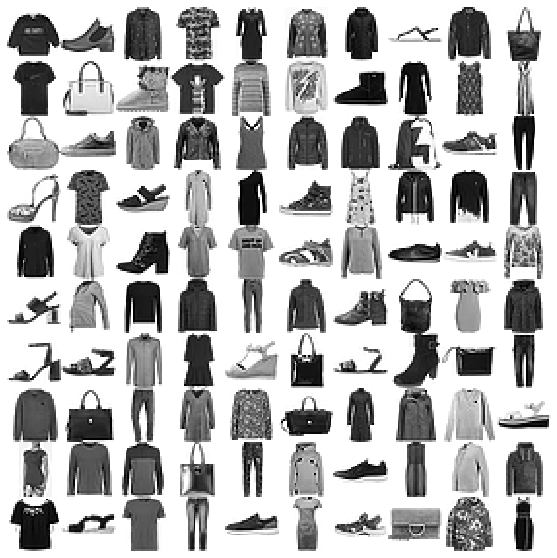

In [23]:
plt.figure(figsize=(10,10))
example_images = X_train[:100]
plot_digits(example_images.values)
plt.show()

In [24]:
def show_time(diff):
    m, s = divmod(diff, 60)
    h, m = divmod(m, 60)
    s, m, h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
    
    print("Execution Time: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s))

In [25]:
training_times = []
testing_times = []
scores = []

In [26]:
def training_and_testing(clf, X, y, X_test, y_test):
    print("Training...")
    start = time.time()
    model = clf.fit(X, y)
    end = time.time()
    training_times.append(end - start)
    show_time(end - start)
    
    
    print("\nTesting...")
    start = time.time()
    scores.append(accuracy_score(y_test, model.predict(X_test)))
    end = time.time()
    testing_times.append(end - start)
    show_time(end - start)
    
    return model

In [34]:
xgb_model = training_and_testing(XGBClassifier(n_estimators=50, max_depth=5), X_train, y_train, X_test, y_test)

Training...
Execution Time: 00:21:04

Testing...
Execution Time: 00:00:00


In [35]:
lgb_model = training_and_testing(LGBMClassifier(n_estimators=50, max_depth=5), X_train, y_train, X_test, y_test)

Training...
Execution Time: 00:01:46

Testing...
Execution Time: 00:00:01


In [27]:
def training_and_testing_with_grid_search(clf, params, X, y, X_test, y_test):
    print("Training with Grid Search...")
    start = time.time()
    model = GridSearchCV(clf, params, scoring='accuracy', n_jobs=-1, cv=5).fit(X,y).best_estimator_
    end = time.time()
    training_times.append(end - start)
    show_time(end - start)
    
    
    print("Testing with Grid Search...")
    start = time.time()
    scores.append(accuracy_score(y_test, model.predict(X_test)))
    end = time.time()
    testing_times.append(end - start)
    show_time(end - start)
    
    return model

In [38]:
param_grid = [{'max_depth': [5,10],
               'n_estimators': [100],
               'learning_rate': [0.05, 0.1],
               'colsample_bytree': [0.8, 0.95]}]

xgb_model_gs = training_and_testing_with_grid_search(XGBClassifier(random_state=42), param_grid, 
                                                X_train[:4000], y_train[:4000], X_test, y_test)

Training with Grid Search...


/anaconda3/envs/dev/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Execution Time: 00:45:16
Testing with Grid Search...
Execution Time: 00:00:01


In [37]:
lgb_model_gs = training_and_testing_with_grid_search(LGBMClassifier(random_state=42), param_grid, 
                                                X_train[:4000], y_train[:4000], X_test, y_test)

Training with Grid Search...
Execution Time: 00:17:14
Testing with Grid Search...
Execution Time: 00:00:01


In [39]:
scores, training_times, testing_times

([0.8716, 0.8717, 0.8509, 0.8476],
 [1264.2565653324127,
  106.44469475746155,
  1033.7386996746063,
  2716.4520568847656],
 [0.42176175117492676,
  0.5533642768859863,
  1.329496145248413,
  0.7895469665527344])

In [41]:
models = [('XGBoost', xgb_model),
          ('LightGBM', lgb_model),
          ('XGBoost Grid Search', xgb_model_gs),
          ('LightGBM Grid Search', lgbm_model_gs)]

In [28]:
def plot_metric(model_scores, score='Accuracy'):
    rcParams['figure.figsize'] = 7,5
    plt.bar(model_scores['Model'], height=model_scores[score])
    xlocs, xlabs = plt.xticks()
    xlocs=[i for i in range(0,6)]
    xlabs=[i for i in range(0,6)]
    for i, v in enumerate(model_scores[score]):
        plt.text(xlocs[i] - 0.25, v + 0.01, str(v))
    plt.xlabel('Model')
    plt.ylabel(score)
    plt.xticks(rotation=45)
    plt.show()

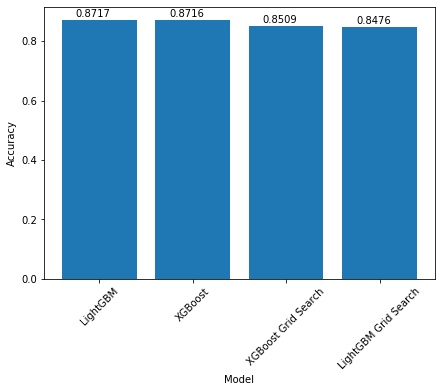

In [49]:
model_scores = pd.DataFrame({ 'Model': [name for name, _ in models], 'Accuracy': scores })
model_scores.sort_values(by='Accuracy',ascending=False,inplace=True)
plot_metric(model_scores)

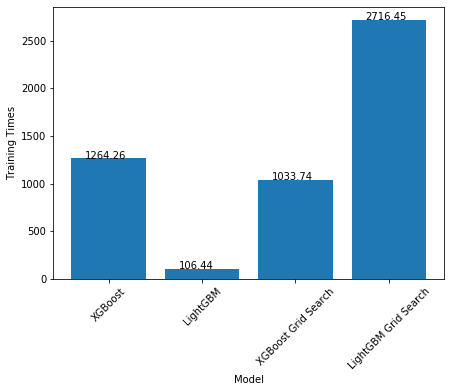

In [50]:
training_times = [round(time,2) for time in training_times]
model_train_times = pd.DataFrame({ 'Model': [name for name, _ in models], 'Training Times': training_times })
plot_metric(model_train_times, score='Training Times')

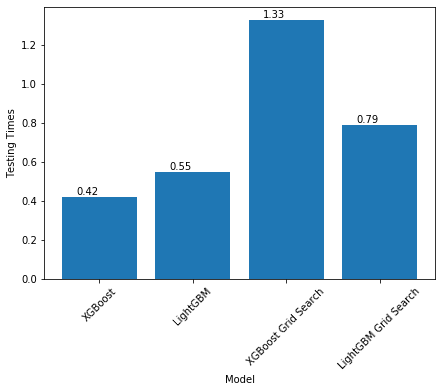

In [54]:
testing_times = [round(time,2) for time in testing_times]
model_train_times = pd.DataFrame({ 'Model': [name for name, _ in models], 'Testing Times': testing_times })
plot_metric(model_train_times, score='Testing Times')

In [29]:
def feature_importances(df, model, model_name, max_num_features=10):
    feature_importances = pd.DataFrame(columns = ['feature', 'importance'])
    feature_importances['feature'] = df.columns
    feature_importances['importance'] = model.feature_importances_
    feature_importances.sort_values(by='importance', ascending=False, inplace=True)
    feature_importances = feature_importances[:max_num_features]
    # print(feature_importances)
    plt.figure(figsize=(12, 6));
    sns.barplot(x="importance", y="feature", data=feature_importances);
    plt.title(model_name+' features importance:');

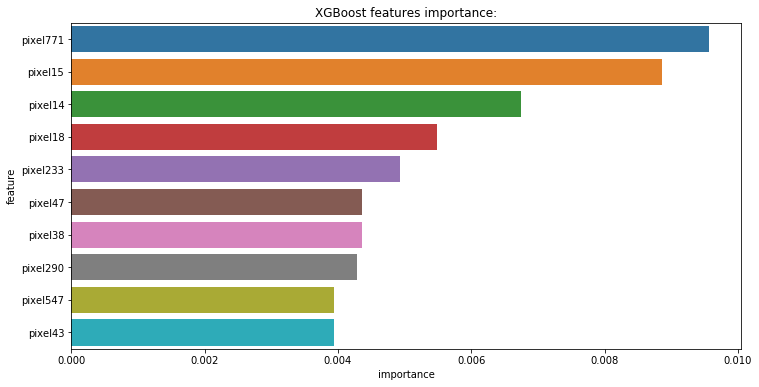

In [59]:
feature_importances(X_train, xgb_model, 'XGBoost')

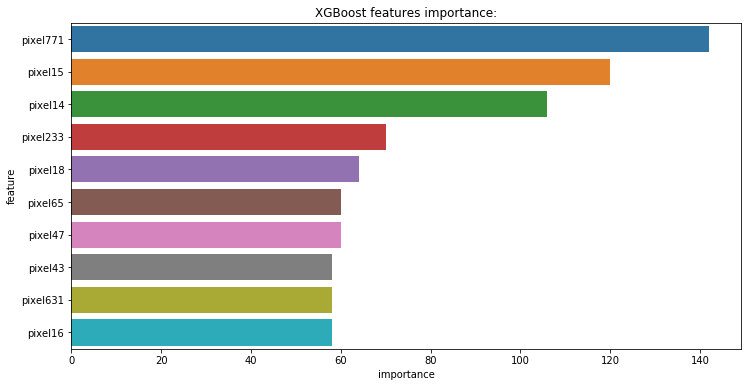

In [60]:
feature_importances(X_train, lgb_model, 'XGBoost')

In [61]:
rcParams['figure.figsize'] = 80,50

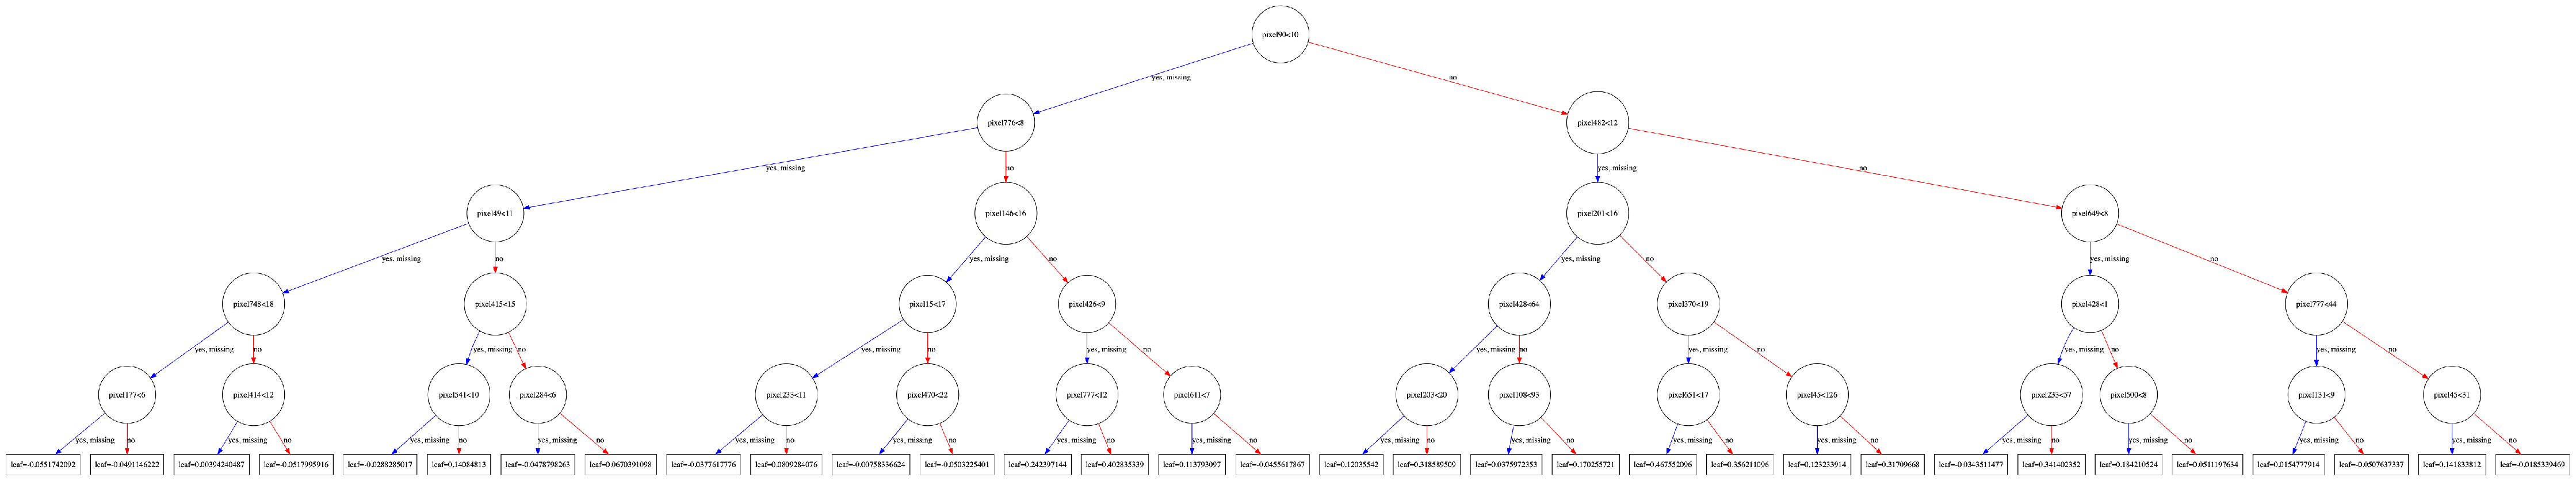

In [64]:
xgboost.plot_tree(xgb_model);

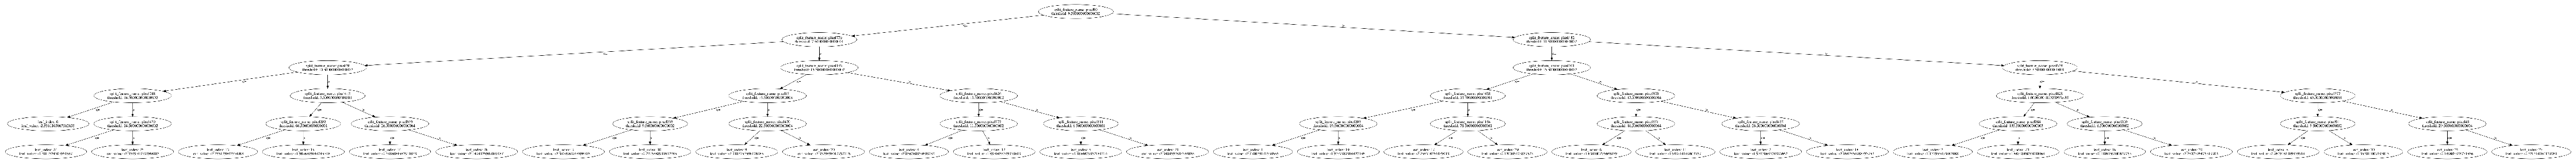

In [66]:
lightgbm.plot_tree(lgb_model)

### LightGBM的应用

In [80]:
# 导入相关包
import numpy as np
import pandas as pd

import lightgbm as lgb

from sklearn.metrics import mean_squared_error

In [70]:
# 加载训练数据和测试数据，以及对应的权重数据
df_train = pd.read_csv("./data/binary.train", header=None, sep='\t')
df_test = pd.read_csv("./data/binary.test", header=None, sep='\t')

W_train = pd.read_csv("./data/binary.train.weight", header=None)[0]
W_test = pd.read_csv("./data/binary.test.weight", header=None)[0]

y_train = df_train[0].values
X_train = df_train.drop(0, axis=1).values

y_test = df_test[0].values
X_test = df_test.drop(0, axis=1).values

num_train, num_feature = X_train.shape

lgb_train = lgb.Dataset(X_train, y_train, weight=W_train, free_raw_data=False)
lgb_eval = lgb.Dataset(X_test, y_test, weight=W_test, free_raw_data=False)

In [71]:
#设置模型参数
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [73]:
#训练模型1-10轮迭代
lgb_model = lgb.train(params,
                      lgb_train,
                      num_boost_round=10,
                      valid_sets=lgb_train,
                      feature_name=feature_name)

[1]	training's binary_logloss: 0.680151
[2]	training's binary_logloss: 0.671664
[3]	training's binary_logloss: 0.664144
[4]	training's binary_logloss: 0.655383
[5]	training's binary_logloss: 0.647397
[6]	training's binary_logloss: 0.640486
[7]	training's binary_logloss: 0.634669
[8]	training's binary_logloss: 0.628028
[9]	training's binary_logloss: 0.621547
[10]	training's binary_logloss: 0.615672


In [74]:
#保存模型
lgb_model.save_model('./data/lgb_model.txt')

In [72]:
#重新加载模型进行预测
lgb_model_reload = lgb.Booster(model_file='./data/lgb_model.txt')
y_pred = lgb_model_reload.predict(X_test)
print(mean_squared_error(y_test, y_pred) ** 0.5)

0.472411476758235


In [76]:
#用已训练模型初始化模型训练11-20轮迭代
lgb_model_retrain = lgb.train(params,
                              lgb_train,
                              num_boost_round=10,
                              init_model='./data/lgb_model.txt',
                              valid_sets=lgb_eval
                              # categorical_feature=[21]
                             )

[11]	valid_0's binary_logloss: 0.617554
[12]	valid_0's binary_logloss: 0.614363
[13]	valid_0's binary_logloss: 0.609672
[14]	valid_0's binary_logloss: 0.606011
[15]	valid_0's binary_logloss: 0.602056
[16]	valid_0's binary_logloss: 0.599294
[17]	valid_0's binary_logloss: 0.595538
[18]	valid_0's binary_logloss: 0.591744
[19]	valid_0's binary_logloss: 0.58883
[20]	valid_0's binary_logloss: 0.585746


/anaconda3/envs/dev/lib/python3.6/site-packages/lightgbm/basic.py:814: UserWarning: The prediction of init_model will be overridden by init_score.
  warnings.warn("The prediction of init_model will be overridden by init_score.")


In [79]:
#调整学习率训练模型21-30轮迭代
lgb_model_retrain = lgb.train(params,
                              lgb_train,
                              num_boost_round=10,
                              init_model=lgb_model_retrain,
                              learning_rates=lambda iter: 0.05 * (0.99 ** iter),
                              valid_sets=lgb_eval)

[41]	valid_0's binary_logloss: 0.617554
[42]	valid_0's binary_logloss: 0.614394
[43]	valid_0's binary_logloss: 0.609792
[44]	valid_0's binary_logloss: 0.606231
[45]	valid_0's binary_logloss: 0.602417
[46]	valid_0's binary_logloss: 0.599771
[47]	valid_0's binary_logloss: 0.59621
[48]	valid_0's binary_logloss: 0.592633
[49]	valid_0's binary_logloss: 0.589609
[50]	valid_0's binary_logloss: 0.586783


In [78]:
#调整其他参数训练模型31-40轮迭代
lgb_model_retrain = lgb.train(params,
                              lgb_train,
                              num_boost_round=10,
                              init_model=lgb_model_retrain,
                              valid_sets=lgb_eval,
                              callbacks=[lgb.reset_parameter(bagging_fraction=[0.7] * 5 + [0.6] * 5)])

[31]	valid_0's binary_logloss: 0.617579
[32]	valid_0's binary_logloss: 0.614267
[33]	valid_0's binary_logloss: 0.609643
[34]	valid_0's binary_logloss: 0.605865
[35]	valid_0's binary_logloss: 0.60161
[36]	valid_0's binary_logloss: 0.598602
[37]	valid_0's binary_logloss: 0.595474
[38]	valid_0's binary_logloss: 0.593449
[39]	valid_0's binary_logloss: 0.591171
[40]	valid_0's binary_logloss: 0.588738


In [81]:
#自定义损失函数
def loglikelood(preds, train_data):
    labels = train_data.get_label()
    preds = 1. / (1. + np.exp(-preds))
    grad = preds - labels 
    hess = preds * (1. - preds)
    return grad, hess

#自定义评估函数
def binary_error(preds, train_data):
    labels = train_data.get_label()
    return 'error', np.mean(labels != (preds > 0.5)), False

#使用自定义损失及评估函数训练模型41-50轮迭代
lgb_model_retrain = lgb.train(params,
                              train_set=lgb_train,
                              num_boost_round=10,
                              init_model=lgb_model_retrain,
                              fobj=loglikelood,
                              feval=binary_error,
                              valid_sets=lgb_eval)

[51]	valid_0's binary_logloss: 5.16783	valid_0's error: 0.402
[52]	valid_0's binary_logloss: 5.46634	valid_0's error: 0.392
[53]	valid_0's binary_logloss: 5.07286	valid_0's error: 0.39
[54]	valid_0's binary_logloss: 5.30891	valid_0's error: 0.382
[55]	valid_0's binary_logloss: 5.54901	valid_0's error: 0.37
[56]	valid_0's binary_logloss: 5.65039	valid_0's error: 0.368
[57]	valid_0's binary_logloss: 5.56936	valid_0's error: 0.356
[58]	valid_0's binary_logloss: 5.73844	valid_0's error: 0.354
[59]	valid_0's binary_logloss: 5.66427	valid_0's error: 0.352
[60]	valid_0's binary_logloss: 5.61407	valid_0's error: 0.35
